In [1]:
import pandas as pd
import numpy as np

In [2]:
cleaned_features = pd.read_csv("cleaned_imputed_features.csv", encoding='utf-8')

In [3]:
target = cleaned_features.GENTRIFIED.values #instantiate target array before dropping GENTRIFIED

In [4]:
cleaned_features.drop('GENTRIFIED', axis=1, inplace=True)

In [5]:
cleaned_features.head(1)

,ACS_09_B08303_HD01_VD01_Estimate__Total_100scale,ACS_09_B08303_HD01_VD02_Estimate__Less_than_5_minutes_100scale,ACS_09_B08303_HD01_VD03_Estimate__5_to_9_minutes_100scale,ACS_09_B08303_HD01_VD04_Estimate__10_to_14_minutes_100scale,ACS_09_B08303_HD01_VD05_Estimate__15_to_19_minutes_100scale,ACS_09_B08303_HD01_VD06_Estimate__20_to_24_minutes_100scale,ACS_09_B08303_HD01_VD07_Estimate__25_to_29_minutes_100scale,ACS_09_B08303_HD01_VD08_Estimate__30_to_34_minutes_100scale,ACS_09_B08303_HD01_VD09_Estimate__35_to_39_minutes_100scale,ACS_09_B08303_HD01_VD10_Estimate__40_to_44_minutes_100scale,...,ACS_09_S2201_HC01_EST_VC23_Total__Estimate__WORK_STATUS__Families__No_workers_in_past_12_months_100scale,ACS_09_S2201_HC02_EST_VC23_Households_receiving_food_stamps__Estimate__WORK_STATUS__Families__No_workers_in_past_12_months_100scale,ACS_09_S2201_HC03_EST_VC23_Households_not_receiving_food_stamps__Estimate__WORK_STATUS__Families__No_workers_in_past_12_months_100scale,ACS_09_S2201_HC01_EST_VC24_Total__Estimate__WORK_STATUS__Families__1_worker_in_past_12_months_100scale,ACS_09_S2201_HC02_EST_VC24_Households_receiving_food_stamps__Estimate__WORK_STATUS__Families__1_worker_in_past_12_months_100scale,ACS_09_S2201_HC03_EST_VC24_Households_not_receiving_food_stamps__Estimate__WORK_STATUS__Families__1_worker_in_past_12_months_100scale,ACS_09_S2201_HC01_EST_VC25_Total__Estimate__WORK_STATUS__Families__2_or_more_workers_in_past_12_months_100scale,ACS_09_S2201_HC02_EST_VC25_Households_receiving_food_stamps__Estimate__WORK_STATUS__Families__2_or_more_workers_in_past_12_months_100scale,ACS_09_S2201_HC03_EST_VC25_Households_not_receiving_food_stamps__Estimate__WORK_STATUS__Families__2_or_more_workers_in_past_12_months_100scale,ACS_09_S2201_HC01_EST_VC27_Total__Estimate__PERCENT_IMPUTED__Food_stamp/SNAP_recipiency_100scale
0,27,13,7,13,14,15,6,20,29,22,...,24,23,21,77,54,65,39,22,41,10


In [6]:
cleaned_features = cleaned_features.replace(-9223372036854775808, 0)

In [62]:
# cleaned_features.to_csv('all_features_sans_9223372036854775808.txt', encoding='utf-8', header=False, index=False) #for regression

In [7]:
features_array  = cleaned_features.values

In [8]:
from sklearn.cross_validation import train_test_split

features_train, features_test, target_train, target_test = train_test_split(
    features_array, target, test_size=0.20, random_state=0)

In [10]:
%%time

from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# rf = RandomForestClassifier(n_estimators=100)
# rf.fit(features_train, target_train)
clf = RandomForestClassifier(n_estimators=100, max_depth=None,
min_samples_split=1, random_state=0)
clf.fit(features_train,target_train)
scores = cross_val_score(clf, features_train, target_train)
scores.mean()      
# scores = cross_val_score(features_array, target, cv=5, n_jobs=4,
#                          scoring='accuracy')
print("Random Forest CV scores:")
print("min: {:.3f}, mean: {:.3f}, max: {:.3f}".format(
    scores.min(), scores.mean(), scores.max()))

Random Forest CV scores:
min: 0.896, mean: 0.898, max: 0.901
Wall time: 1.16 s


In [27]:
%%time

from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,
                                subsample=.8, max_features=.5)
scores = cross_val_score(gb, features_train, target_train, cv=5, n_jobs=4,
                         scoring='accuracy')
print("Gradient Boosted Trees CV scores:")
print("min: {:.3f}, mean: {:.3f}, max: {:.3f}".format(
    scores.min(), scores.mean(), scores.max()))


#Note Classification with more than 2 classes requires the induction of n_classes regression trees at each at
#each iteration, thus, the total number of induced trees equals n_classes * n_estimators. For datasets with 
#a large number of classes we strongly recommend to use RandomForestClassifier as an alternative to GradientBoostingClassifier .

Gradient Boosted Trees CV scores:
min: 0.867, mean: 0.877, max: 0.888
Wall time: 19 s


In [11]:
target_predicted = clf.predict(features_test)

In [12]:
from sklearn.metrics import accuracy_score

accuracy_score(target_test, target_predicted)

0.88617886178861793

In [13]:
clf.score(features_test, target_test)

0.88617886178861793

In [14]:
from sklearn.metrics import classification_report

#wow! 100% recall....

print(classification_report(target_test, target_predicted,
                            target_names=['eligible', 'not eligible']))

              precision    recall  f1-score   support

    eligible       0.89      1.00      0.94       109
not eligible       0.00      0.00      0.00        14

 avg / total       0.79      0.89      0.83       123



C:\WinPython-64bit-3.4.3.5\python-3.4.3.amd64\lib\site-packages\sklearn\metrics\classification.py:958: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [15]:
target_predicted_prob = clf.predict_proba(features_test)

In [38]:
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

def plot_roc_curve(target_test, target_predicted_proba):
    fpr, tpr, thresholds = roc_curve(target_test, target_predicted_proba[:, 1])
    
    roc_auc = auc(fpr, tpr)
    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")

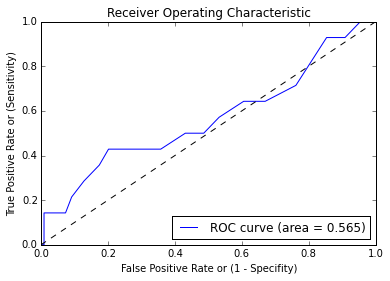

In [39]:
plot_roc_curve(target_test,target_predicted_prob)

In [44]:
from sklearn.cross_validation import cross_val_score

scores = cross_val_score(clf, features_array, target, cv=5)

In [45]:
scores.min(), scores.max(), scores.mean()

(0.72727272727272729, 0.7967479674796748, 0.77272363781760023)

In [47]:
scores = cross_val_score(clf, features_array, target, cv=3,
                         scoring='roc_auc')
scores.min(), scores.mean(), scores.max()

(0.46611721611721613, 0.48366114759557383, 0.50585480093676805)

In [28]:
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.tree import DecisionTreeClassifier

In [42]:
clf = DecisionTreeClassifier(max_depth=None, min_samples_split=1,
random_state=0)
scores = cross_val_score(clf, features_train, target_train)
scores.mean()                             

0.77310034859039789

In [41]:
clf = RandomForestClassifier(n_estimators=10, max_depth=None,
min_samples_split=1, random_state=0)
scores = cross_val_score(clf, features_train, target_train)
scores.mean()                             

0.89570290442736289

In [40]:
clf = ExtraTreesClassifier(n_estimators=10, max_depth=None,
min_samples_split=1, random_state=0)
scores = cross_val_score(clf, features_train, target_train)
scores.mean()

0.89572799727088392

In [17]:
n_estimators = 100
forest = RandomForestClassifier(warm_start=True, oob_score=True)

for i in range(1, n_estimators + 1):
    forest.set_params(n_estimators=i)
    forest.fit(features_train, target_train)
    print(i, forest.oob_score_)

C:\WinPython-64bit-3.4.3.5\python-3.4.3.amd64\lib\site-packages\sklearn\ensemble\forest.py:379: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\WinPython-64bit-3.4.3.5\python-3.4.3.amd64\lib\site-packages\sklearn\ensemble\forest.py:379: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\WinPython-64bit-3.4.3.5\python-3.4.3.amd64\lib\site-packages\sklearn\ensemble\forest.py:379: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\WinPython-64bit-3.4.3.5\python-3.4.3.amd64\lib\site-packages\sklearn\ensemble\forest.py:379: UserWarning: Some inputs do not have OOB scores. This probably means too few trees

1 0.867075664622
2 0.856850715746
3 0.856850715746
4 0.846625766871
5 0.840490797546
6 0.844580777096
7 0.862985685072
8 0.867075664622
9 0.869120654397
10 0.879345603272
11 0.879345603272
12 0.883435582822
13 0.887525562372
14 0.885480572597
15 0.885480572597
16

C:\WinPython-64bit-3.4.3.5\python-3.4.3.amd64\lib\site-packages\sklearn\ensemble\forest.py:379: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\WinPython-64bit-3.4.3.5\python-3.4.3.amd64\lib\site-packages\sklearn\ensemble\forest.py:379: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\WinPython-64bit-3.4.3.5\python-3.4.3.amd64\lib\site-packages\sklearn\ensemble\forest.py:379: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\WinPython-64bit-3.4.3.5\python-3.4.3.amd64\lib\site-packages\sklearn\ensemble\forest.py:379: UserWarning: Some inputs do not have OOB scores. This probably means too few trees

 0.887525562372
17 0.887525562372
18 0.889570552147
19 0.893660531697
20 0.893660531697
21 0.893660531697
22 0.893660531697
23 0.893660531697
24 0.893660531697
25 0.893660531697
26 0.893660531697
27 0.893660531697
28 0.893660531697
29 0.893660531697
30 0.893660531697
31 0.891615541922
32 0.891615541922
33 0.893660531697
34 0.893660531697
35 0.893660531697
36 0.893660531697
37 0.893660531697
38 0.895705521472
39 0.895705521472
40 0.895705521472
41 0.897750511247
42 0.895705521472
43 0.897750511247
44 0.899795501022
45 0.897750511247
46 0.897750511247
47 0.897750511247
48 0.897750511247
49 0.897750511247
50 0.897750511247
51 0.897750511247
52 0.897750511247
53 0.897750511247
54 0.897750511247
55 0.897750511247
56 0.897750511247
57 0.897750511247
58 0.897750511247
59 0.895705521472
60 0.897750511247
61 0.897750511247
62 0.897750511247
63 0.897750511247
64 0.897750511247
65 0.897750511247
66 0.897750511247
67 0.897750511247
68 0.897750511247
69 0.897750511247
70 0.897750511247
71 0.8977505

C:\WinPython-64bit-3.4.3.5\python-3.4.3.amd64\lib\site-packages\sklearn\ensemble\forest.py:379: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\WinPython-64bit-3.4.3.5\python-3.4.3.amd64\lib\site-packages\sklearn\ensemble\forest.py:379: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


In [19]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.grid_search import GridSearchCV

gb = GradientBoostingClassifier(n_estimators=100, subsample=.8)

params = {
    'learning_rate': [0.05, 0.1, 0.5],
    'max_features': [0.5, 1],
    'max_depth': [3, 4, 5],
}
gs = GridSearchCV(gb, params, cv=5, scoring='roc_auc', n_jobs=4)
gs.fit(features_array, target)

Wall time: 20.1 s


In [20]:
sorted(gs.grid_scores_, key=lambda x: x.mean_validation_score, reverse=True)

[mean: 0.54434, std: 0.07359, params: {'max_features': 1, 'learning_rate': 0.1, 'max_depth': 4},
 mean: 0.53248, std: 0.06158, params: {'max_features': 1, 'learning_rate': 0.1, 'max_depth': 3},
 mean: 0.52133, std: 0.06257, params: {'max_features': 1, 'learning_rate': 0.05, 'max_depth': 4},
 mean: 0.50770, std: 0.09941, params: {'max_features': 0.5, 'learning_rate': 0.1, 'max_depth': 3},
 mean: 0.50692, std: 0.08588, params: {'max_features': 1, 'learning_rate': 0.05, 'max_depth': 5},
 mean: 0.50481, std: 0.10401, params: {'max_features': 0.5, 'learning_rate': 0.5, 'max_depth': 4},
 mean: 0.50276, std: 0.08066, params: {'max_features': 0.5, 'learning_rate': 0.1, 'max_depth': 5},
 mean: 0.49343, std: 0.06240, params: {'max_features': 0.5, 'learning_rate': 0.05, 'max_depth': 3},
 mean: 0.49055, std: 0.08518, params: {'max_features': 0.5, 'learning_rate': 0.05, 'max_depth': 4},
 mean: 0.48980, std: 0.08731, params: {'max_features': 0.5, 'learning_rate': 0.1, 'max_depth': 4},
 mean: 0.48965

In [23]:
from sklearn.ensemble import RandomForestRegressor

numberTrees = 100
clf = RandomForestRegressor(n_estimators=numberTrees)
clf.fit(features_train,target_train)
for tree in range(numberTrees):
#     print(clf.estimators_[tree].predict(val.irow(1)))
    per_tree_pred = [tree.predict(features_train) for tree in clf.estimators_]
    print(per_tree_pred[0])

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  1.
  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.
  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.
  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.
  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

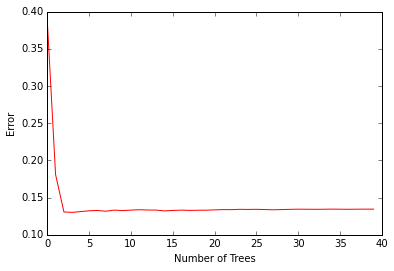

In [35]:
%matplotlib inline

import matplotlib.pyplot as plt


from sklearn.metrics import log_loss


errors = []
growing_rf = RandomForestClassifier(n_estimators=10, n_jobs=-1,  
                                    warm_start=True, random_state=1000)
for i in range(40):
    growing_rf.fit(features_train, target_train)
    growing_rf.n_estimators += 10
    errors.append(log_loss(target, growing_rf.predict_proba(features_array)))

_ = plt.plot(errors, '-r')
plt.xlabel('Number of Trees')
plt.ylabel('Error')